# Практическая работа № 1. Предварительная обработка данных

Автор: Артём Макаров
Группа: КИ20-16/2б
Вариант 8

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from scipy.stats import sigmaclip


In [75]:
df = pd.read_excel('data/first_practice_dataframe.xlsx')
df = df[['cat15_programmingLanguage',
         'cat4_income', 'num1_9', 'num2_9', 'num3_9']]
df

,cat15_programmingLanguage,cat4_income,num1_9,num2_9,num3_9
0,C++,"$40,001 - $50,000",38.394563,-310.892227,475.769166
1,C++,"$40,001 - $50,000",-9999.000000,-68.997463,333.541193
2,C++,"$40,001 - $50,000",441.196689,450.783312,450.809984
3,C++,"Below $30,001",210.914486,202.884884,442.997016
4,C++,-,-285.346725,NaN,376.479737
...,...,...,...,...,...
995,js,"$30,001 - $40,000",824.065303,426.900079,393.041594
996,C++,"Below $30,001",288.392553,1426.635214,258.163126
997,Java,"$30,001 - $40,000",-14.932614,471.835574,NaN
998,c,"Below $30,001",374.417925,480.725687,269.02597


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cat15_programmingLanguage  981 non-null    object 
 1   cat4_income                980 non-null    object 
 2   num1_9                     1000 non-null   float64
 3   num2_9                     952 non-null    float64
 4   num3_9                     970 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


In [77]:
df['cat15_programmingLanguage'].unique()

array(['C++', 'c', 'Python', 'Java', 'C', '-', 'js', ' ', nan],
      dtype=object)

In [78]:
df['cat4_income'].unique()

array(['$40,001 - $50,000', 'Below $30,001', '-', '$30,001 - $40,000 ',
       ' ', 'below $30,001', nan, '$50,001 and'], dtype=object)

In [79]:
df2 = df.copy()

## Задание 1, 2

Визуальный анализ данных. Построить визуальное представление для каждого столбца (признака) в исходном наборе данных. Провести анализ полученных диаграмм Примечание: для качественных переменных должны быть построены столбчатая и круговая диаграммы, для количественных переменных – гистограмма, оценка плотности распределения и диаграмма «ящик с усами».

Провести проверку правдоподобности исходных данных. Проверка правдоподобности исходных данных должна включать проверку типов исходных данных, лишних пропусков, невозможных значений и т.п. Привести найденные значения к нужному формату

### Обработка

In [80]:
def data_processing(data: pd.core.frame.DataFrame, columns: list[str], dtype: str) -> pd.core.frame.DataFrame:
    """
    Функция обработки данных
    :param data: датафрейм
    :type data: pandas.core.frame.DataFrame
    :param columns: список столбцов
    :type columns: list[str]
    :param dtype: тип данных
    :type dtype: string
    :return: датафрейм
    :rtype: pandas.core.frame.DataFrame
    """
    for column in columns:
        data[column] = data[column].replace({'-': None, ' ': None})
        if column in ['cat15_programmingLanguage', 'cat4_income']:
            data[column] = data[column].str.capitalize()
        if dtype == "float":
            data[column] = data[column].replace({-9999: np.nan})
        data[column] = data[column].astype(dtype)
    return data


In [81]:
data_processing(df2, ['cat15_programmingLanguage', 'cat4_income'], "category")
data_processing(df2, ['num1_9', 'num2_9', 'num3_9'], "float")
data_processing(df, ['num3_9'], "float")
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   cat15_programmingLanguage  941 non-null    category
 1   cat4_income                941 non-null    category
 2   num1_9                     951 non-null    float64 
 3   num2_9                     952 non-null    float64 
 4   num3_9                     912 non-null    float64 
dtypes: category(2), float64(3)
memory usage: 25.9 KB


In [82]:
df2['cat15_programmingLanguage'].unique()

['C++', 'C', 'Python', 'Java', NaN, 'Js']
Categories (5, object): ['C', 'C++', 'Java', 'Js', 'Python']

### Построение графиков

In [83]:
def graphs_for_categories(data: pd.core.frame.DataFrame, column: str) -> None:
    """
    Визуализация категориальных переменных
    :param data: датафрейм
    :type data: pandas.core.frame.DataFrame
    :param column: название столбца
    :type column: string
    :rtype: void
    """
    counts = Counter(data[column].dropna())
    figure, axis = plt.subplots(1, 2, figsize=(22, 10))
    axis[0].bar(counts.keys(), counts.values())
    axis[0].set_title(f'BarPlot для {column}')

    counts = Counter(data[column].dropna())
    axis[1].pie(counts.values(), labels=counts.keys())
    axis[1].set_title(f'PiePlot для {column}')
    plt.show()


def graphs_for_num(data: pd.core.frame.DataFrame, column: str) -> None:
    """
    Визуализация количественных переменных
    :param data: датафрейм
    :type data: pandas.core.frame.DataFrame
    :param column: название столбца
    :type column: string
    :rtype: void
    """
    figure, axis = plt.subplots(1, 2, figsize=(22, 10))
    sns.histplot(data[column], kde=True, color='blue', ax=axis[0])
    axis[0].set_title(f'Гистограмма для {column}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')

    sns.boxplot(data=data[column], ax=axis[1])
    axis[1].set_title(f'Ящик с усами для {column}')
    plt.show()


#### До обработки данных

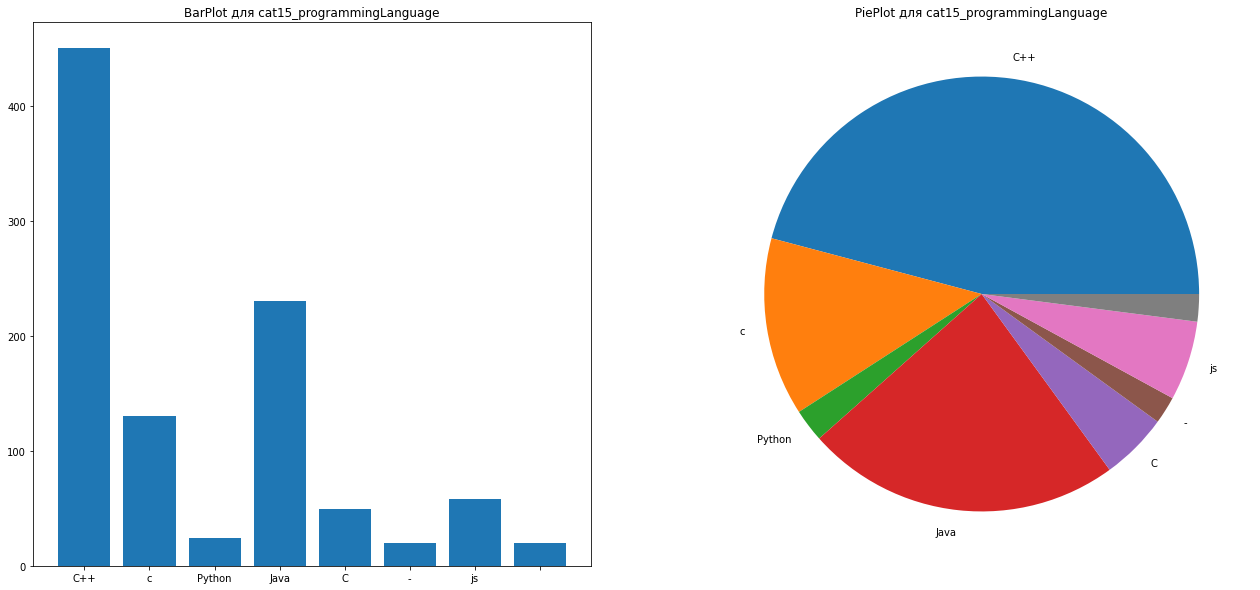

In [84]:
graphs_for_categories(df, 'cat15_programmingLanguage')

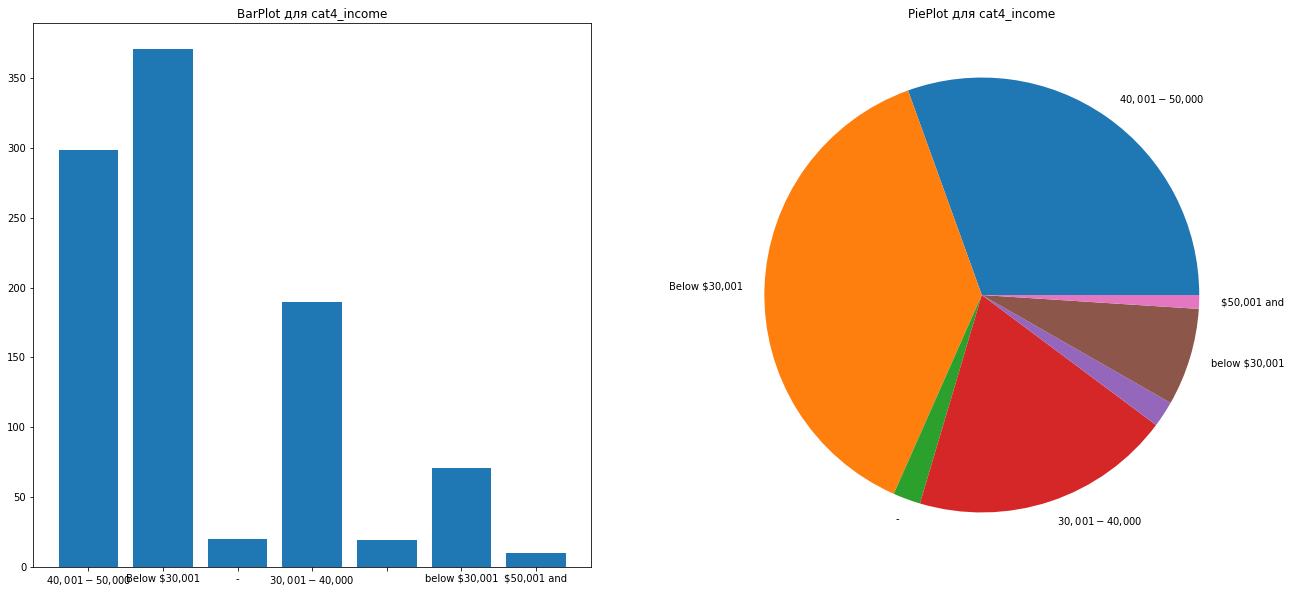

In [85]:
graphs_for_categories(df, 'cat4_income')

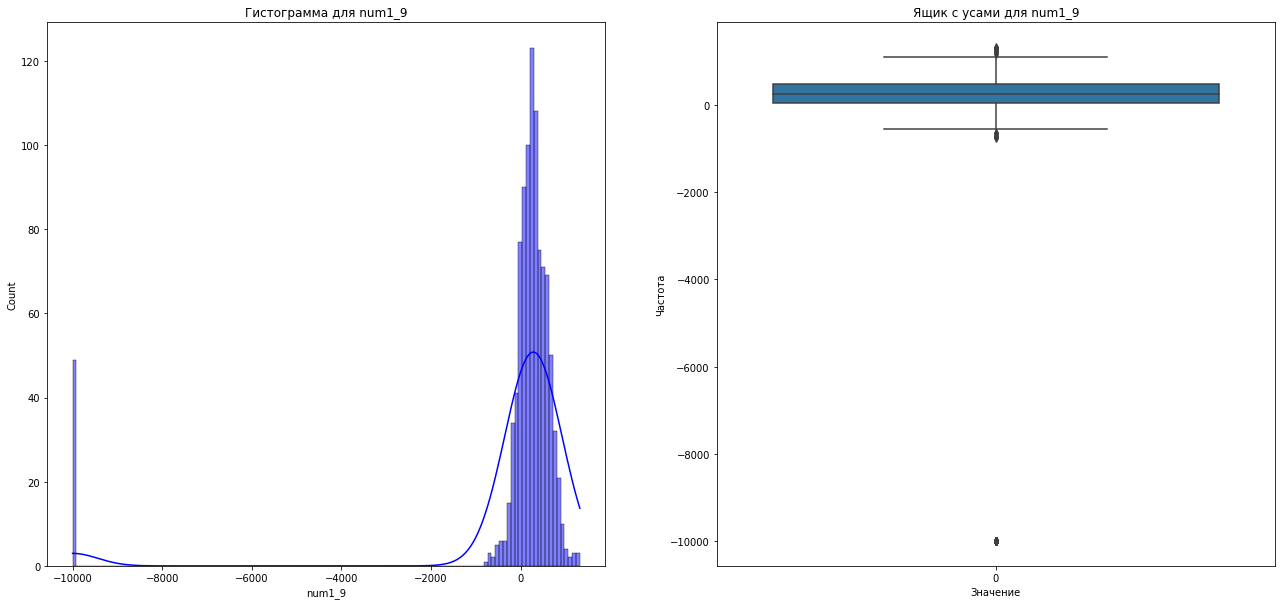

In [86]:
graphs_for_num(df, 'num1_9')

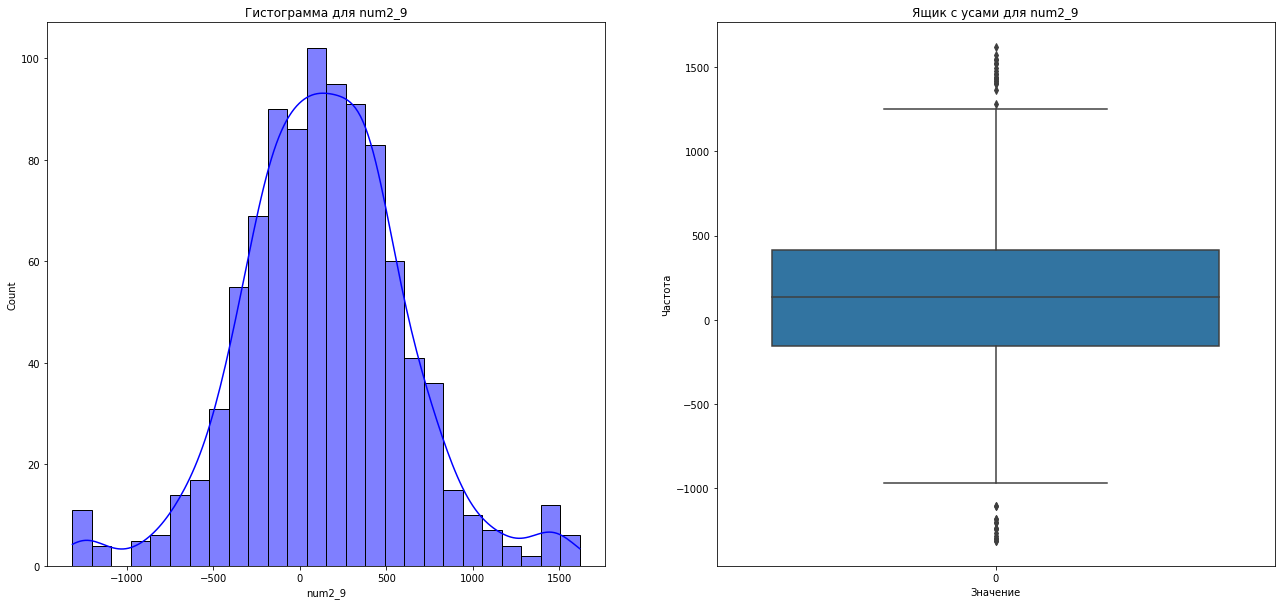

In [87]:
graphs_for_num(df, 'num2_9')

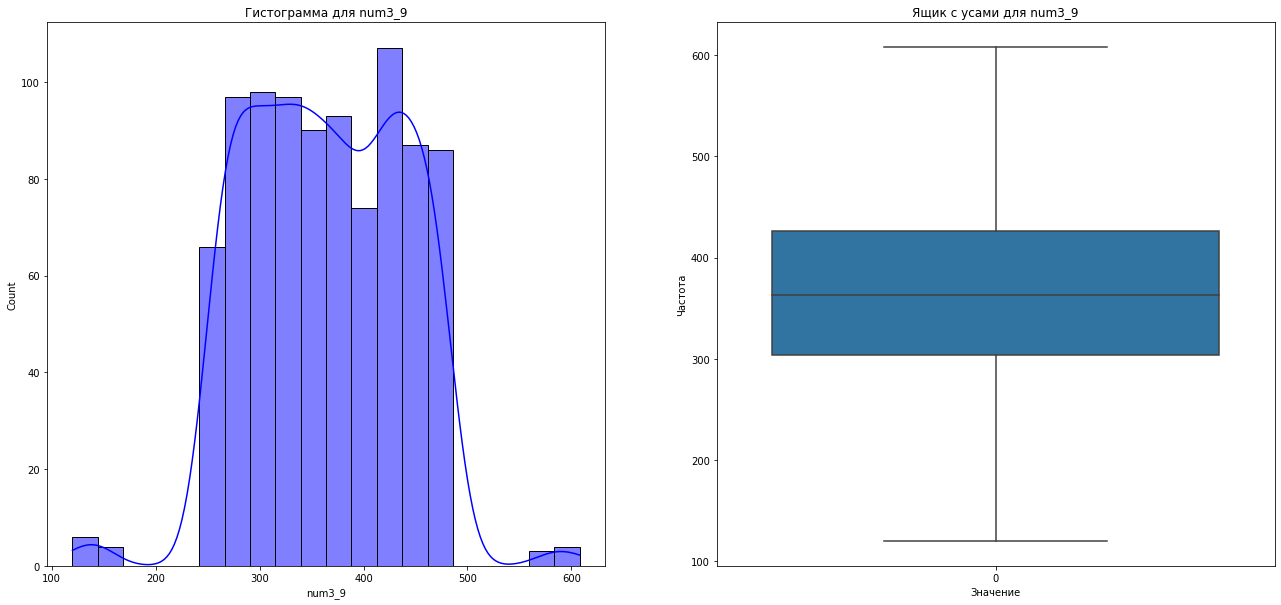

In [88]:
graphs_for_num(df, 'num3_9')

#### После обработки данных

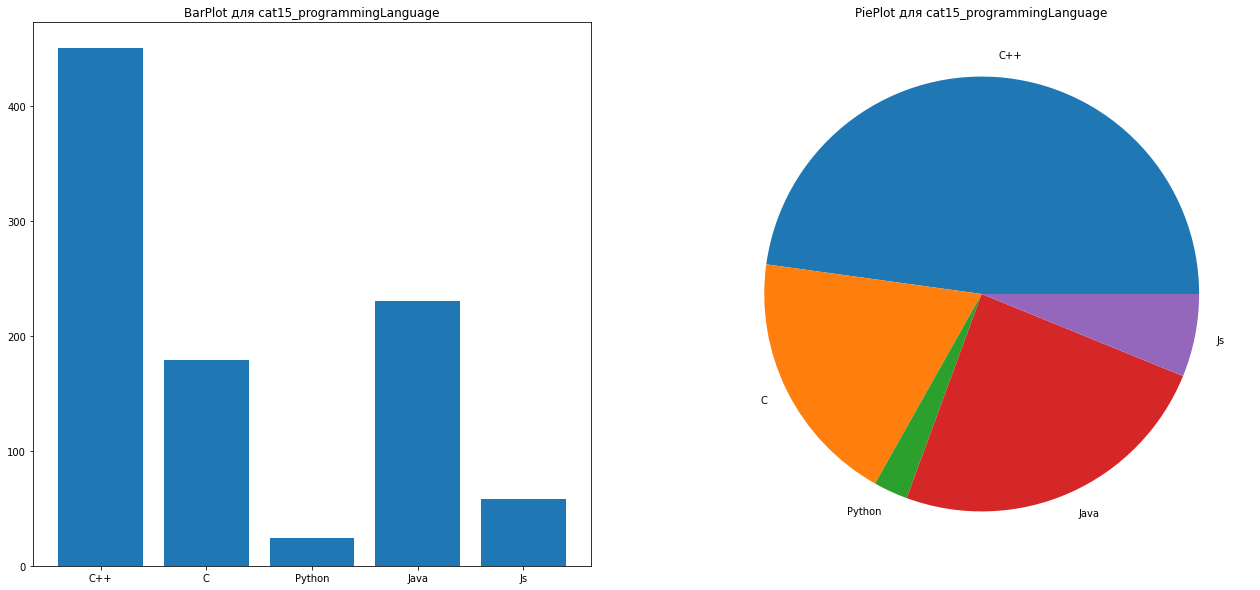

In [89]:
graphs_for_categories(df2, 'cat15_programmingLanguage')

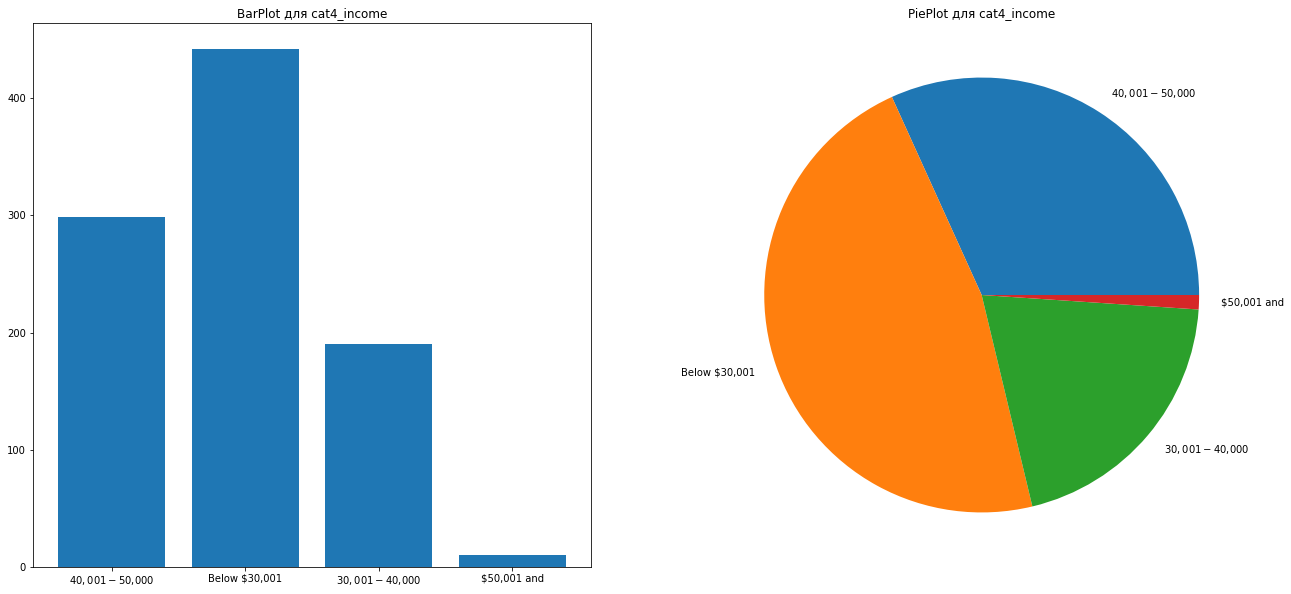

In [90]:
graphs_for_categories(df2, 'cat4_income')

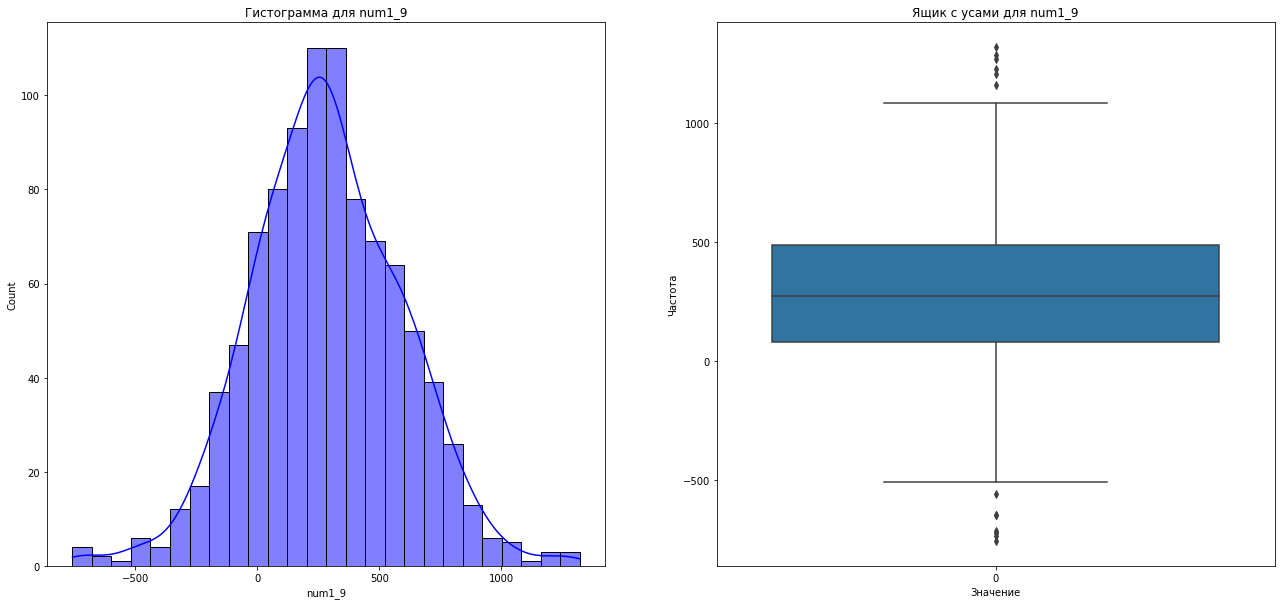

In [91]:
graphs_for_num(df2, 'num1_9')

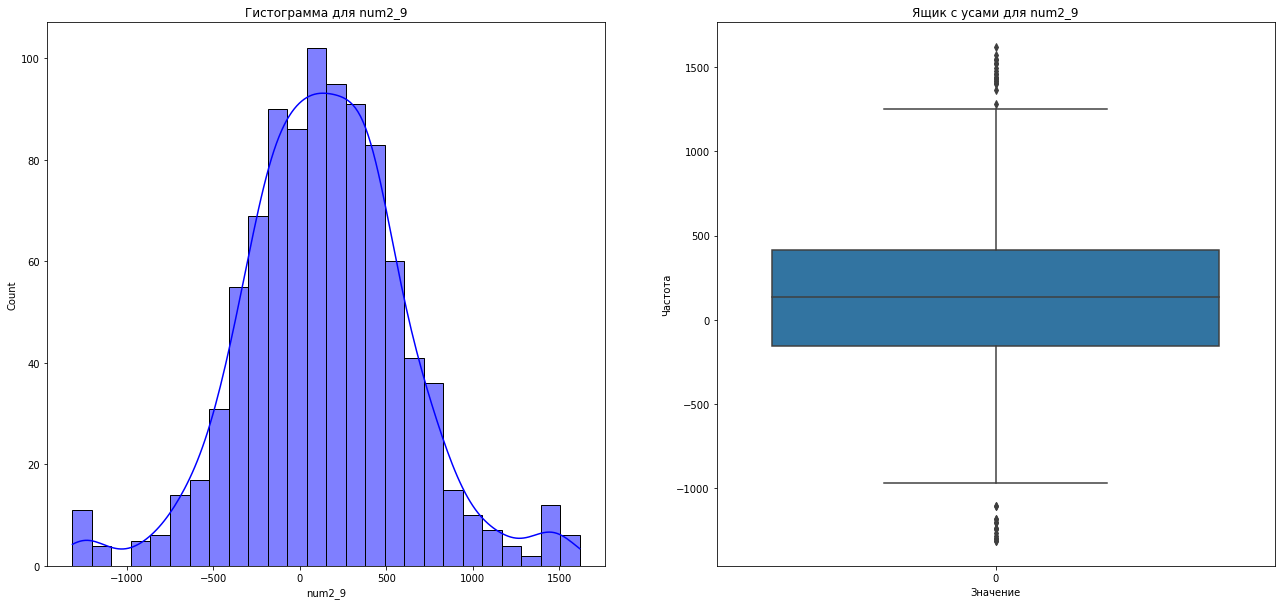

In [92]:
graphs_for_num(df2, 'num2_9')

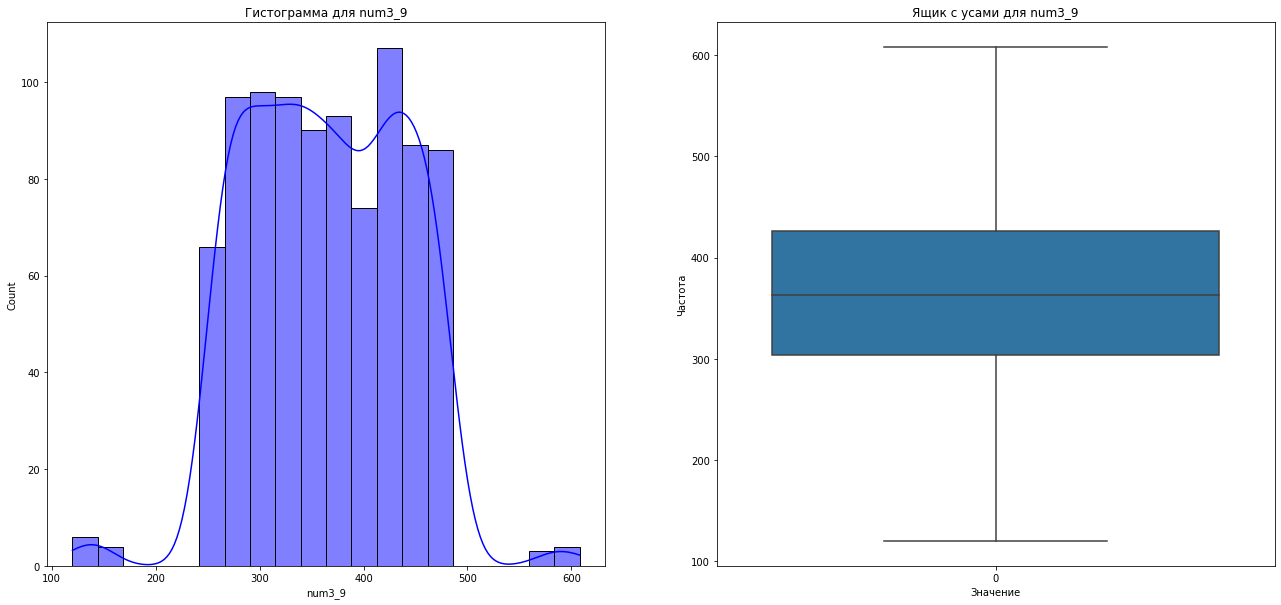

In [93]:
graphs_for_num(df2, 'num3_9')

## Задание 3. Поиск аномальных значений

Провести поиск значений в исходном наборе данных, резко отличающихся от других значений (выбросов). Строки с найденными выбросами удалить из исходного набора данных. Примечание: для поиска выбросов воспользоваться методом сигм (использовать готовую реализацию scipy.stats.sigmaclip) или метод квартилей (реализовать самостоятельно). Провести анализ полученных результатов. Использовать результаты очистки данных, полученных с помощью метода сигм.

### Метод квартилей

In [94]:
def finding_outliers(data: pd.core.frame.DataFrame, columns: list[str]) -> pd.core.frame.DataFrame:
    """
    Функция поиска выбросов
    :param data: датафрейм
    :type data: pandas.core.frame.DataFrame
    :param column: список столбцов
    :type column: list[str]
    :return: датафрейм без выбросов
    :rtype: pandas.core.frame.DataFrame
    """
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 - IQR
        higher_fence = Q3 + IQR
        outlier_indexes = list()
        outlier_indexes.extend(data.index[(data[column] < lower_fence) | (data[column] > higher_fence)])
        data = data.drop(outlier_indexes)

        sns.boxplot(data=data[column])
        plt.title(f'Boxplot для {column}')
        plt.show()
    return data


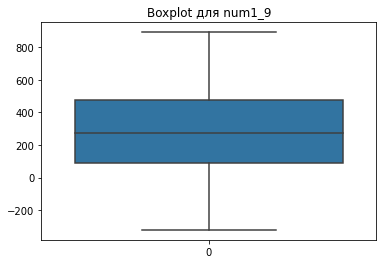

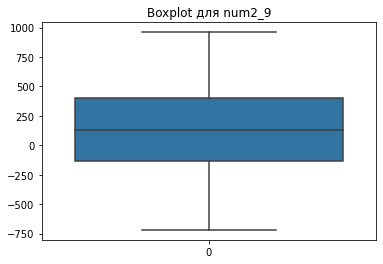

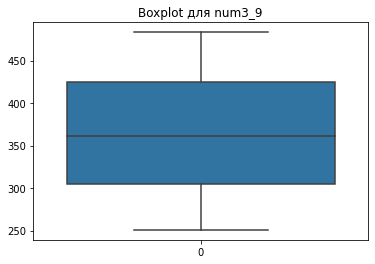

In [95]:
data = df2.copy()
df2 = finding_outliers(df2, ['num1_9', 'num2_9', 'num3_9'])

### Метод сигм

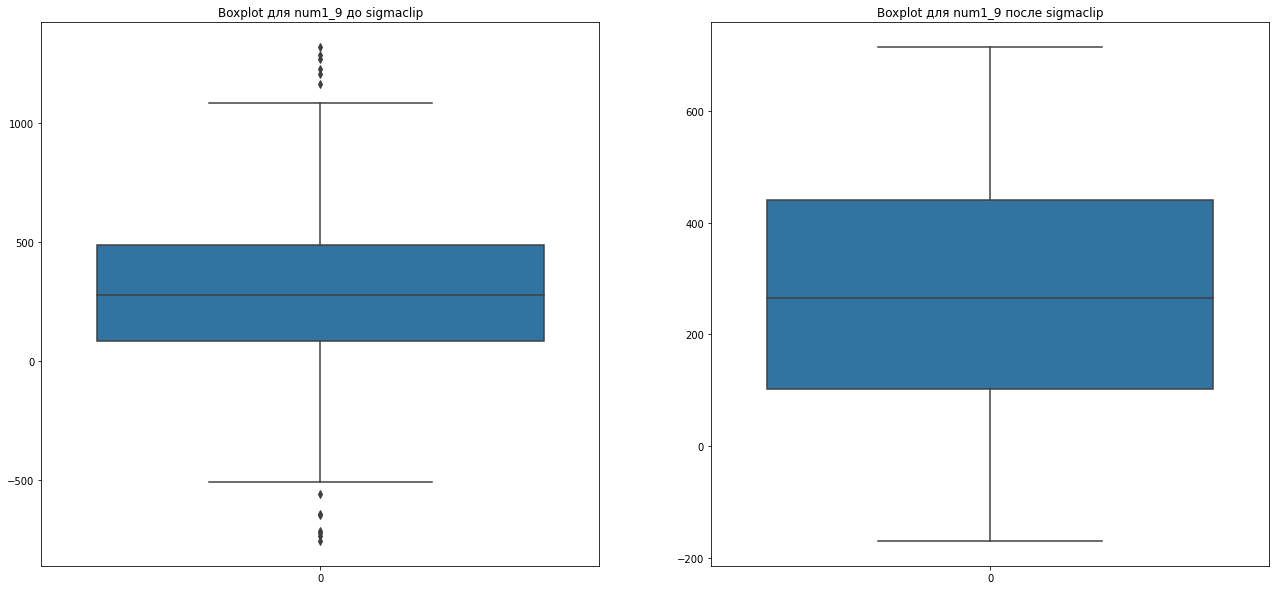

In [96]:
figure, axis = plt.subplots(1, 2, figsize=(22, 10))
sns.boxplot(data=data['num1_9'], ax=axis[0])
axis[0].set_title(f'Boxplot для num1_9 до sigmaclip')
modified_column, low, up = sigmaclip(
    data['num1_9'].dropna().to_list(), 2, 2)
sns.boxplot(data=modified_column, ax=axis[1])
axis[1].set_title(f'Boxplot для num1_9 после sigmaclip')
plt.show()


Проиндексируем датафрейм заново

In [97]:
df2 = df2.reindex(range(0, df2['num1_9'].count()))

## Задание 4. Поиск и восстановление пропущенных значений

Провести поиск пропущенных значений в исходных данных. Вывести статистику по пропускам для каждого признака. Восстановить пропущенные значения. Примечание: для первого признака для восстановления пропусков использовать метод 𝑘- ближайших соседей, для второго пропущенные значения заменить самым популярным значением, для третьего использовать среднее значение, для четвертого – медиану, для пятого – метод «𝑘-ближайших соседей». Для восстановления пропусков методом «k ближайших соседей» использовать одну из готовых реализаций sklearn.impute.KNNImputer, impyute.imputation.cs.fast_knn).

Проверим наличие NaN значений

In [98]:
df2.isna().any(axis=1).sum()

301

Заполним пропуски

In [99]:
imputer = KNNImputer(n_neighbors=1)
most_popular_value = df2['cat15_programmingLanguage'].describe()['top']
df2['cat15_programmingLanguage'] = df2['cat15_programmingLanguage'].fillna(most_popular_value)
most_popular_value = df2['cat4_income'].describe()['top']
df2['cat4_income'] = df2['cat4_income'].fillna(most_popular_value)
df2[['num1_9']] = imputer.fit_transform(df2[['num1_9']])
df2['num2_9'] = df2['num2_9'].fillna(df2['num2_9'].median())
df2['num3_9'] = df2['num3_9'].fillna(df2['num3_9'].mean())

Проверим наличие NaN значений

In [100]:
df2.isna().any(axis=1).sum()

0

Выведем графики после полной обработки данных

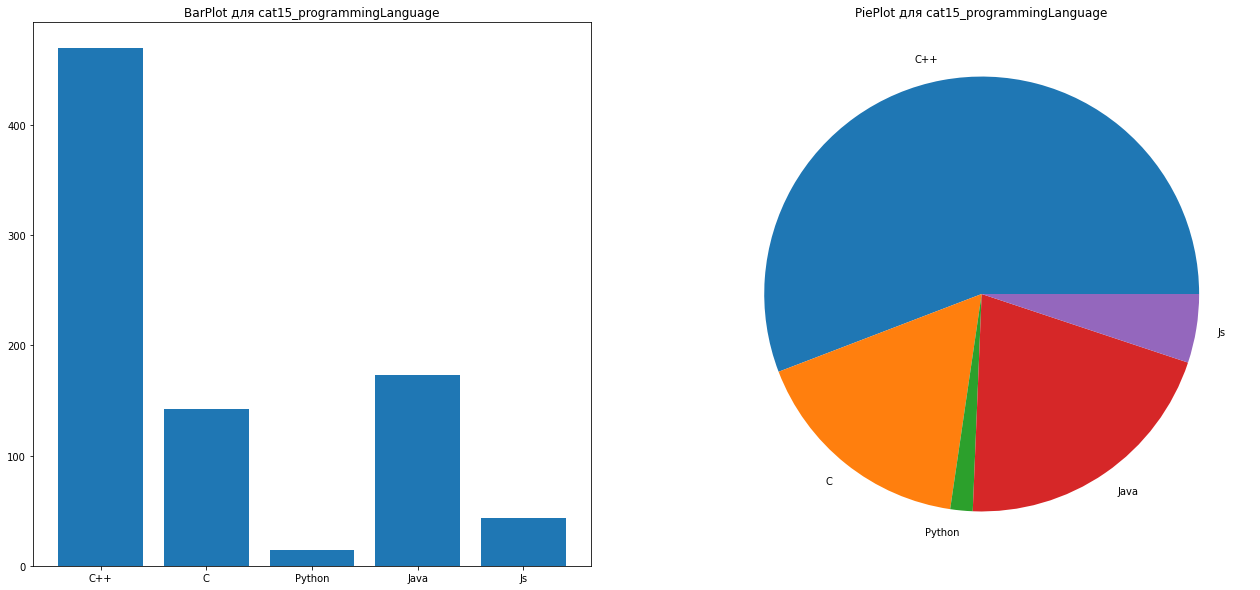

In [101]:
graphs_for_categories(df2, 'cat15_programmingLanguage')

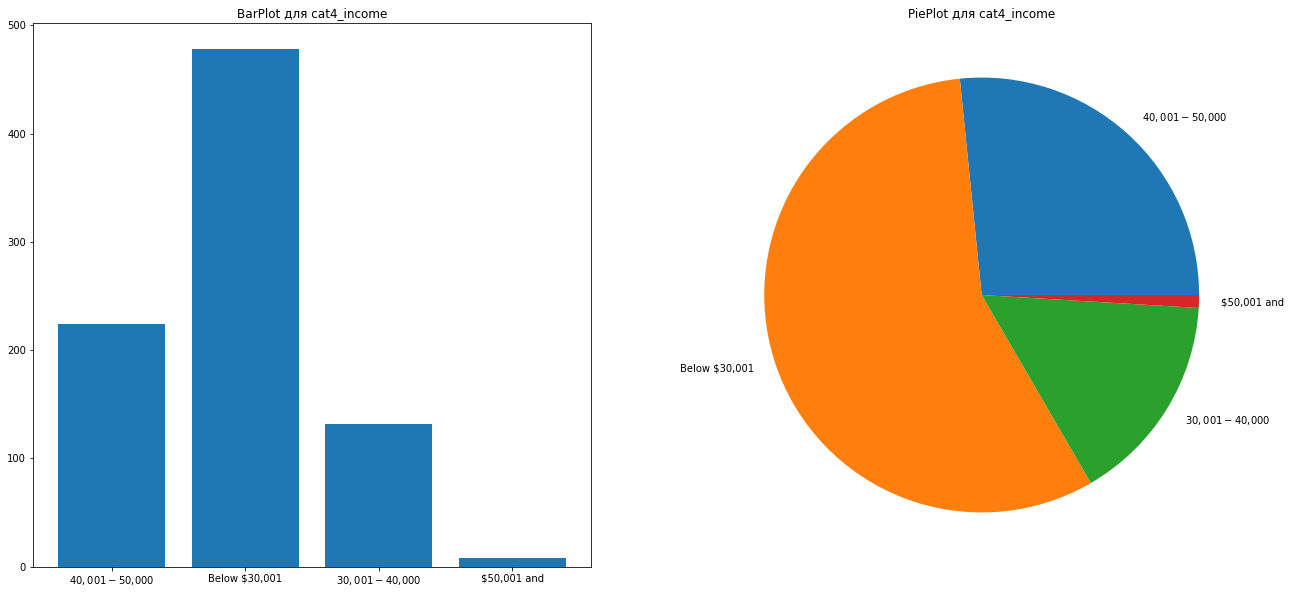

In [102]:
graphs_for_categories(df2, 'cat4_income')


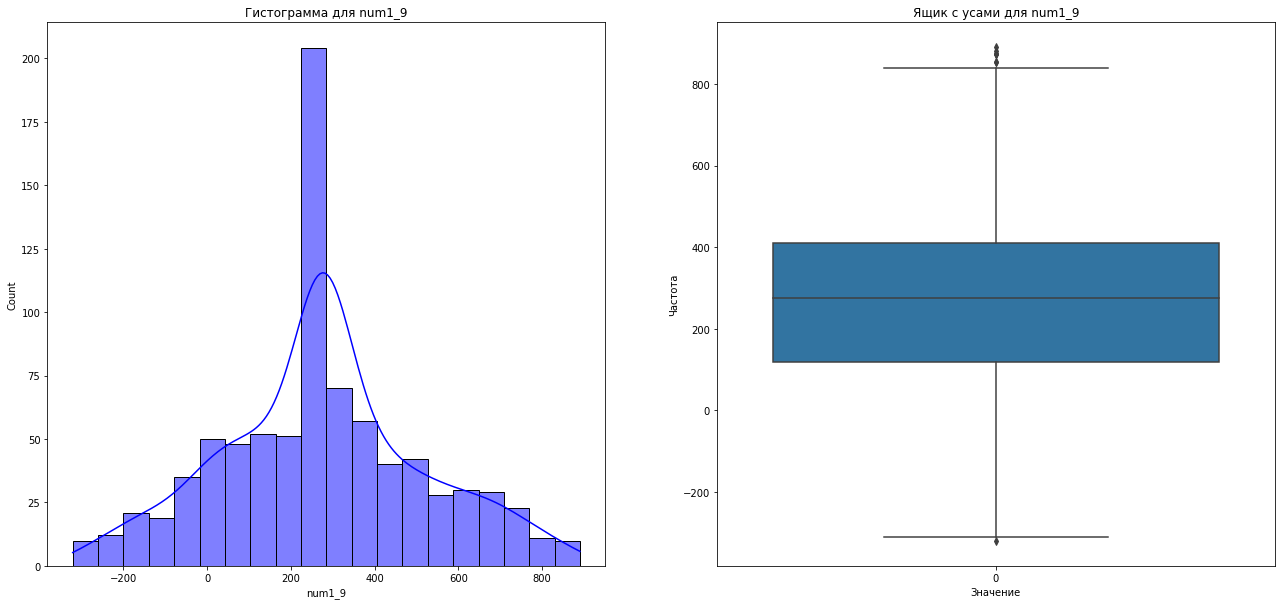

In [103]:
graphs_for_num(df2, 'num1_9')

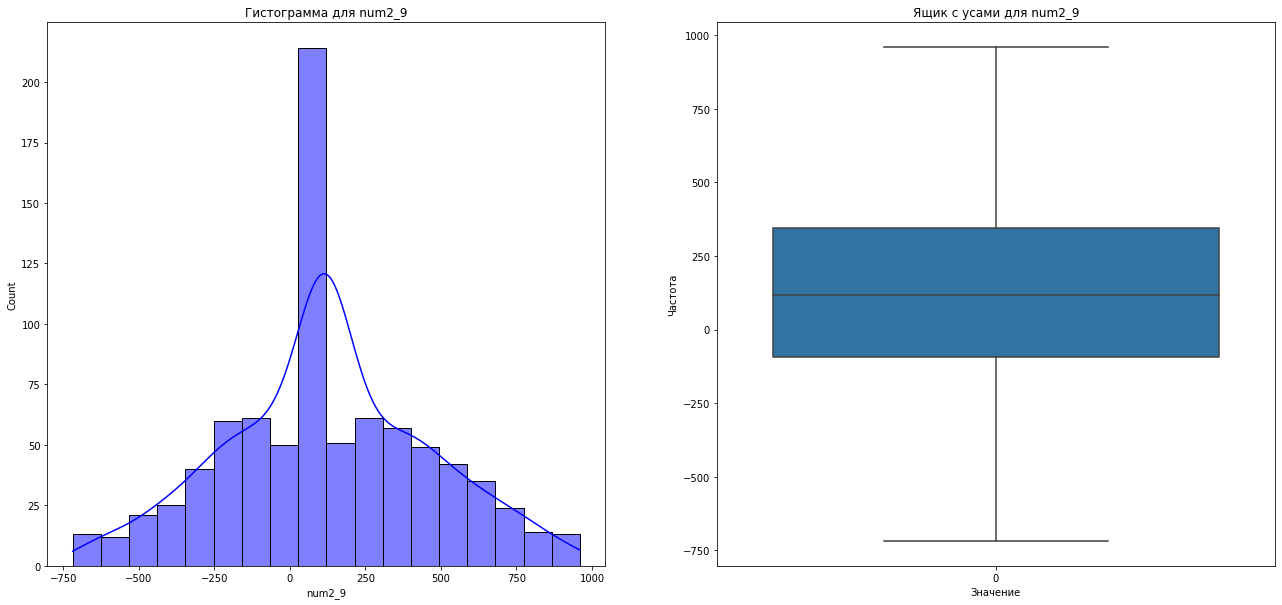

In [104]:
graphs_for_num(df2, 'num2_9')


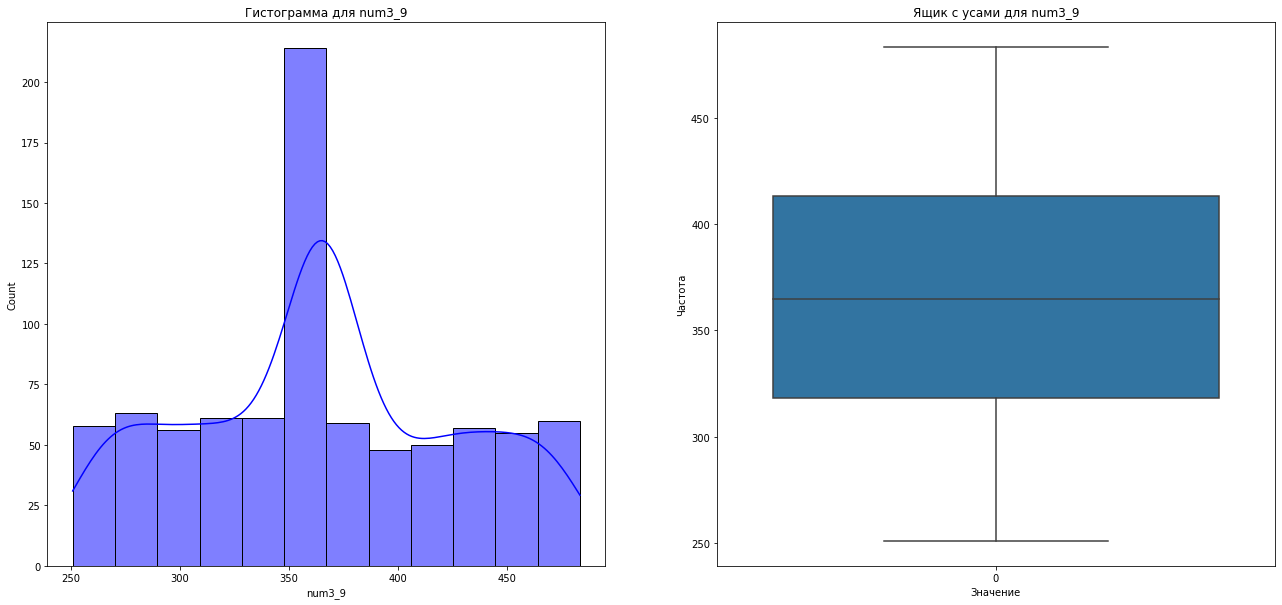

In [105]:
graphs_for_num(df2, 'num3_9')


## Задание 5. Преобразование данных

Привести числовые признаки к стандартному виду. Для категориальных признаков выполнить их кодировку. Примечание:
для количественных переменных выполняем стандартизацию и нормализацию, для качественных переменных – one-hot encoding (для первого) и label encoding (для второго). Для преобразования использовать готовую реализацию sklearn.preprocessing.

In [106]:
lst = df2['cat4_income'].unique().to_list()
lst.sort()

In [107]:
le = LabelEncoder()
df2['Languages'] = le.fit_transform(df2['cat15_programmingLanguage'])

ohe = OneHotEncoder()
ohe_data = pd.DataFrame(ohe.fit_transform(df2[['cat4_income']]).toarray(), columns=lst)
data = df2.join(ohe_data)
data


,cat15_programmingLanguage,cat4_income,num1_9,num2_9,num3_9,Languages,"$30,001 - $40,000","$40,001 - $50,000","$50,001 and","Below $30,001"
0,C++,"$40,001 - $50,000",38.394563,-310.892227,475.769166,1,0.0,1.0,0.0,0.0
1,C++,"$40,001 - $50,000",275.995928,-68.997463,333.541193,1,0.0,1.0,0.0,0.0
2,C++,"$40,001 - $50,000",441.196689,450.783312,450.809984,1,0.0,1.0,0.0,0.0
3,C++,"Below $30,001",210.914486,202.884884,442.997016,1,0.0,0.0,0.0,1.0
4,C++,"Below $30,001",-285.346725,117.131069,376.479737,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
837,C++,"$30,001 - $40,000",127.326414,-13.435502,423.678672,1,1.0,0.0,0.0,0.0
838,C++,"Below $30,001",275.995928,770.849704,364.984589,1,0.0,0.0,0.0,1.0
839,C,"Below $30,001",70.697187,-150.650042,364.984589,0,0.0,0.0,0.0,1.0
840,C++,"Below $30,001",275.995928,117.131069,364.984589,1,0.0,0.0,0.0,1.0


In [108]:
minmax_scaler = MinMaxScaler()
data[['num1_9', 'num2_9']] = minmax_scaler.fit_transform(data[['num1_9', 'num2_9']])

standard_scaler = StandardScaler()
data[['num3_9']] = standard_scaler.fit_transform(data[['num3_9']])
data

,cat15_programmingLanguage,cat4_income,num1_9,num2_9,num3_9,Languages,"$30,001 - $40,000","$40,001 - $50,000","$50,001 and","Below $30,001"
0,C++,"$40,001 - $50,000",0.296730,0.243142,1.805570e+00,1,0.0,1.0,0.0,0.0
1,C++,"$40,001 - $50,000",0.492752,0.387174,-5.124653e-01,1,0.0,1.0,0.0,0.0
2,C++,"$40,001 - $50,000",0.629043,0.696669,1.398785e+00,1,0.0,1.0,0.0,0.0
3,C++,"Below $30,001",0.439060,0.549062,1.271449e+00,1,0.0,0.0,0.0,1.0
4,C++,"Below $30,001",0.029643,0.498001,1.873482e-01,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
837,C++,"$30,001 - $40,000",0.370099,0.420257,9.565977e-01,1,1.0,0.0,0.0,0.0
838,C++,"Below $30,001",0.492752,0.887248,9.264355e-16,1,0.0,0.0,0.0,1.0
839,C,"Below $30,001",0.323380,0.338555,9.264355e-16,0,0.0,0.0,0.0,1.0
840,C++,"Below $30,001",0.492752,0.498001,9.264355e-16,1,0.0,0.0,0.0,1.0
